# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Exploration: Gain Insight From Data </b></p>
---

# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Exploration: Gain Insight From Data </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Đinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Đo Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents
---

# Data Inspection and Analysis

## Basic Information
- [v] **Rows and Columns:**
  - How many rows and columns are there in your data?

- [Quang] **Meaning of Each Row/Column:**
  - What is the meaning of each row/column?

- [v] **Datatypes:**
  - What is the datatype of each column?
  - List all features with suitable types.
  - List features with unsuitable types.

Please strictly follow these requirements:

- For each requirement above, you need to code to show the answer and must have markdown cells to `comment about the result`.
- When providing comments or explaining results, it is advisable `not to write too much text`. Instead, we can use the learned forms of charts to accomplish this. This will help the reader better understand the issue.
- Markdown cells must be written clearly: proper nouns or important number should be enclosed in ``` or **\` to `indicate/highlight` them. If listing, bullet points or numbered lists should be used. This stage will help\ _Data Pre-processing_ stage very much so your comment/explaination must be understandable. Think for the readers!!!
- These requirements above are just basic, you can read the slides in this subject, `part 2 of the book` attached in our discord (important) or find on Google. You can feel free to add more requirements in this stage but remember, in this stage we just get insights our data through statistical info, we don’t work (change) on our data.


## Import libaries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Define constants
Go to [(1) Reading the raw data](#reading-the-raw-data) <br>
Go to [(2) Count the number of missing values per column](#count-the-number-of-missing-values-per-column) <br>

In [19]:
RAW_FILE_PATH = '../data/raw.csv'   # path to raw data .csv file (1)
COL_MISSING_DROP_RATE = 0.33        # to drop columns having many missing values (2)

## Reading the raw data

In [20]:
# Read raw data
raw_data = pd.read_csv(RAW_FILE_PATH)
print(f'This data has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns')

This data has 5000 rows and 36 columns


## Data Quality Check
- [v] **Duplicated Rows:**
  - Are there any duplicated rows?
  - Show how many.
  - Calculate the rate of duplicate rows.

- [v] **Missing Values:**
  - Are there any missing values?
  - Show how many missing values in each column.
  - Show the missing rate.

- [ ] **Incorrect Data Check:**
  - Check if the values in the data column are correct and aligned with the meaning.
  - List all incorrect data in detail.


## Count duplicate rows

In [21]:
# Check for duplicate rows
duplicates_series = raw_data.duplicated()

print(f'The data has {sum(duplicates_series)} duplicate rows.')
print(f'The duplicate rows are: {[i for i, d in enumerate(duplicates_series) if d == True]}')

The data has 0 duplicate rows.
The duplicate rows are: []


## Count the number of missing values per row
"Empty values (or null values) are used within the data set to indicate an absence of data, such as missing weather information or unknown data. They are not used to indicate a zero value. For example, an unknown precipitation value will be marked as empty or null. A zero amount of precipitation will be indicated by the value zero."

https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/

In [22]:
# Count the number of missing values in each row
missing_values_per_row = raw_data.isnull().sum(axis=1)

# Count the number of rows for each count of missing values
count_of_missing_values = missing_values_per_row.value_counts().sort_index()

# Dcount_of_missing_values
for missing_count, row_count in count_of_missing_values.items():
    print(f"Missing {missing_count} values, there are {row_count} rows ({round(row_count * 100.0 / raw_data.shape[0])}%).")

Missing 0 values, there are 369 rows (7%).
Missing 1 values, there are 143 rows (3%).
Missing 3 values, there are 356 rows (7%).
Missing 4 values, there are 2611 rows (52%).
Missing 5 values, there are 1424 rows (28%).
Missing 6 values, there are 1 rows (0%).
Missing 9 values, there are 96 rows (2%).


## Count the number of missing values per column
<a id='count_missing_col'></a>
[Define COL_MISSING_DROP_RATE](#define-constants)

In [23]:
# Count the number of missing values for each column
missing_values_per_column = raw_data.isnull().sum()

# Convert to percentage
missing_values_per_column_percent = missing_values_per_column / raw_data.shape[0]

# define missing drop rate and find to-be-dropped cols
# define COL_MISSING_DROP_RATE in 'Define constants'
q = "'"
for col, percent in missing_values_per_column_percent.items():
    if percent >= COL_MISSING_DROP_RATE:
        print(f'Column {(q+col+q).ljust(12)} is missing {round(percent*100)}% of values.')

Column 'preciptype' is missing 37% of values.
Column 'snow'       is missing 90% of values.
Column 'snowdepth'  is missing 90% of values.
Column 'windgust'   is missing 79% of values.
Column 'severerisk' is missing 90% of values.


In [24]:
# Storing the columns' names (for COPY + PASTE)
to_drop_col_name = [col for col, percent in missing_values_per_column_percent.items() if percent >= COL_MISSING_DROP_RATE]
to_drop_col_name

['preciptype', 'snow', 'snowdepth', 'windgust', 'severerisk']

## Incorrect Data Check
Checking each columnn value if it satisfied the column criteria. <br>
Define a CRITERIA `dictionary` of the following format:

{<br>
    **'column 1'**: `[criteria 1]`<br>
    **'column 2'**: `[criteria 2]`<br>
    ... <br>
    **'column n'**: `[criteria n]`<br>
}

**'column 1', 'column 2',...,'column n'** are the columns names (string).<br>
`[criteria 1], [criteria 2],...,[criteria n]` are the criterias (list).<br>

The `criteria`s are depend on the column's data type:
- Numeric: checking if a value is in [min, max]
    - criteria[0]: numeric data type
    - criteria[1]: min
    - criteria[2]: max
    - Example: {'temp': [float, 0, 100]}
- Categorical:
    - criteria[0]: str
    - Example: {'country': [str]}

In [25]:
MIN_F = -459.67     # 0 Kelvin to Fahrenheit
MAX_F = 134 + 10    # according to https://wmo.asu.edu/content/world-highest-temperature

MIN_WIND_SPEED = 0      # miles/hour
MAX_WIN_SPEED = 1000    # miles/hour

# Percentage scale 0-100
MIN_PERCENT_100 = 0
MAX_PERCENT_100 = 100

# Percentage scale 0-1
MIN_PERCENT_1 = 0
MAX_PERCENT_1 = 1

CRITERIA = {'datetime':         ['str'],
            'datetimeEpoch':    ['int'],
            'tempmax':          ['float', MIN_F, MAX_F], 
            'tempmin':          ['float', MIN_F, MAX_F],
            'temp':             ['float', MIN_F, MAX_F],
            'feelslikemax':     ['float', MIN_F, MAX_F], 
            'feelslikemin':     ['float', MIN_F, MAX_F], 
            'feelslike':        ['float', MIN_F, MAX_F], 
            'dew':              ['float', MIN_PERCENT_100, MAX_PERCENT_100], 
            'humidity':         ['float', MIN_PERCENT_100, MAX_PERCENT_100],
            'precip':           ['float'],
            'precipprob':       ['float', MIN_PERCENT_100, MAX_PERCENT_100], 
            'precipcover':      ['float', MIN_PERCENT_100, MAX_PERCENT_100], 
            'preciptype':       ['str'], 
            'snow':             ['float'],
            'snowdepth':        ['float'],
            'windgust':         ['float'], 
            'windspeed':        ['float'], 
            'winddir':          ['float', 0, 360], 
            'pressure':         ['float'],
            'cloudcover':       ['float', MIN_PERCENT_100, MAX_PERCENT_100],
            'visibility':       ['float'],
            'solarradiation':   ['float'], 
            'solarenergy':      ['float'], 
            'uvindex':          ['int', 0, 10],
            'sunrise':          ['str'],
            'sunriseEpoch':     ['int'], 
            'sunset':           ['str'], 
            'sunsetEpoch':      ['int'], 
            'moonphase':        ['float', MIN_PERCENT_1, MAX_PERCENT_1],
            'conditions':       ['str'],
            'description':      ['str'], 
            'icon':             ['str'], 
            'stations':         ['str'], 
            'source':           ['str'], 
            'severerisk':       ['str'],
            'normal':           ['str']}

In [26]:
def checking_criteria():
    pass


## Data Distribution Analysis

In [27]:
# Handle 'datetime' column from str -> datetime
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'])

# Handle 'sunrise' and 'sunset' columns from str -> int (seconds after midnight)
raw_data['sunrise'] = pd.to_timedelta(raw_data['sunrise']).dt.total_seconds()
raw_data['sunset'] = pd.to_timedelta(raw_data['sunset']).dt.total_seconds()

In [28]:
# Spliting the data
raw_data_numeric = raw_data.select_dtypes(include='number')
raw_data_categorical = raw_data.select_dtypes(exclude='number')

In [29]:
raw_data_numeric.head()

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,severerisk
0,1253984400,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,NaN,...,5.6,NaN,NaN,NaN,20523.0,1254004923,63977.0,1254048377,0.27,NaN
1,1254070800,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,NaN,...,6.6,NaN,NaN,NaN,20520.0,1254091320,63939.0,1254134739,0.30,NaN
2,1254157200,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,NaN,...,6.6,NaN,NaN,NaN,20518.0,1254177718,63901.0,1254221101,0.34,NaN
3,1254243600,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,NaN,...,5.7,NaN,NaN,NaN,20516.0,1254264116,63864.0,1254307464,0.37,NaN
4,1254330000,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,NaN,...,6.6,NaN,NaN,NaN,20514.0,1254350514,63826.0,1254393826,0.40,NaN


In [30]:
raw_data_categorical.head()

,datetime,preciptype,conditions,description,icon,stations,source
0,2009-09-27,NaN,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs
1,2009-09-28,NaN,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs
2,2009-09-29,NaN,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs
3,2009-09-30,NaN,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs
4,2009-10-01,NaN,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs


### Numerical Data
- [ ] **Descriptive Statistics:**
  - Find min, max, median, mode, std.
  - Make a conclusion on skewness.

- [ ] **Outliers:**
  - Use box plot to find outliers.
  - Comment on the abnormality of outliers.

In [31]:
# Display summary statistics
summary_stats = raw_data_numeric.describe()

# Calculate mode separately, as it's not included in describe()
mode_values = raw_data_numeric.mode().iloc[0]

# Convert mode values to a DataFrame and transpose it
mode_df = pd.DataFrame(mode_values).transpose()

# Concatenate summary statistics and mode values
summary_stats = pd.concat([summary_stats, mode_df]).rename(index={mode_df.index[0]: 'mode'})

# Display the results
summary_stats

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,severerisk
count,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4904.000000,...,5000.000000,4904.000000,4904.000000,4904.000000,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5000.000000,512.000000
mean,1.469941e+09,91.041220,76.14564,82.354120,99.919340,76.942880,87.187940,73.726820,77.205960,0.176869,...,6.055920,205.420310,17.744168,7.201876,20974.707800,1.469962e+09,64603.808400,1.470006e+09,0.483794,27.919922
std,1.247201e+08,3.281317,3.21651,2.659416,5.709696,4.945019,5.232159,3.837916,9.359366,0.427174,...,1.174452,59.917768,5.181503,2.019694,884.759487,1.247201e+08,1006.387513,1.247202e+08,0.288521,18.727091
min,1.253984e+09,73.600000,44.50000,71.700000,73.600000,41.200000,71.700000,54.100000,49.500000,0.000000,...,3.200000,15.000000,1.300000,1.000000,19777.000000,1.254005e+09,62796.000000,1.254048e+09,0.000000,10.000000
25%,1.361963e+09,89.600000,74.37500,80.700000,96.400000,74.375000,83.575000,71.800000,70.800000,0.000000,...,5.800000,155.975000,13.500000,6.000000,20388.000000,1.361985e+09,63715.750000,1.362028e+09,0.250000,10.000000
50%,1.469941e+09,91.400000,76.90000,82.400000,100.300000,76.900000,86.800000,74.800000,77.900000,0.020000,...,6.100000,204.700000,17.700000,7.000000,20608.000000,1.469962e+09,64989.500000,1.470007e+09,0.480000,30.000000
75%,1.577920e+09,93.200000,78.70000,84.100000,103.900000,78.700000,90.400000,76.500000,84.300000,0.160000,...,6.400000,255.400000,22.000000,9.000000,21733.000000,1.577942e+09,65337.000000,1.577983e+09,0.750000,30.000000
max,1.685898e+09,100.500000,85.90000,90.500000,119.700000,100.300000,106.900000,81.400000,99.800000,8.946000,...,47.600000,324.200000,28.000000,10.000000,22618.000000,1.685918e+09,66006.000000,1.685964e+09,0.980000,75.000000
mode,1.253984e+09,91.400000,75.20000,83.100000,105.100000,75.200000,85.700000,76.600000,73.700000,0.000000,...,6.500000,173.000000,21.500000,9.000000,20612.000000,1.254005e+09,65044.000000,1.254048e+09,0.250000,10.000000


In [32]:
# Calculate skewness based on mean and median
skewness = (summary_stats.loc['mean'] - summary_stats.loc['50%']).apply(lambda x: 'Right-skewed' if x > 0 else 'Left-skewed' if x < 0 else 'Symmetric')

# Display the skewness conclusion
skewness

datetimeEpoch        Symmetric
tempmax            Left-skewed
tempmin            Left-skewed
temp               Left-skewed
feelslikemax       Left-skewed
feelslikemin      Right-skewed
feelslike         Right-skewed
dew                Left-skewed
humidity           Left-skewed
precip            Right-skewed
precipprob         Left-skewed
precipcover       Right-skewed
snow                 Symmetric
snowdepth            Symmetric
windgust          Right-skewed
windspeed         Right-skewed
winddir           Right-skewed
pressure          Right-skewed
cloudcover        Right-skewed
visibility         Left-skewed
solarradiation    Right-skewed
solarenergy       Right-skewed
uvindex           Right-skewed
sunrise           Right-skewed
sunriseEpoch      Right-skewed
sunset             Left-skewed
sunsetEpoch        Left-skewed
moonphase         Right-skewed
severerisk         Left-skewed
dtype: object

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'datetimeEpoch'}>,
        <Axes: title={'center': 'tempmax'}>,
        <Axes: title={'center': 'tempmin'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'feelslikemax'}>,
        <Axes: title={'center': 'feelslikemin'}>,
        <Axes: title={'center': 'feelslike'}>,
        <Axes: title={'center': 'dew'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'precip'}>,
        <Axes: title={'center': 'precipprob'}>,
        <Axes: title={'center': 'precipcover'}>,
        <Axes: title={'center': 'snow'}>,
        <Axes: title={'center': 'snowdepth'}>],
       [<Axes: title={'center': 'windgust'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'winddir'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'visibility'}>,
        <Axes: title={'

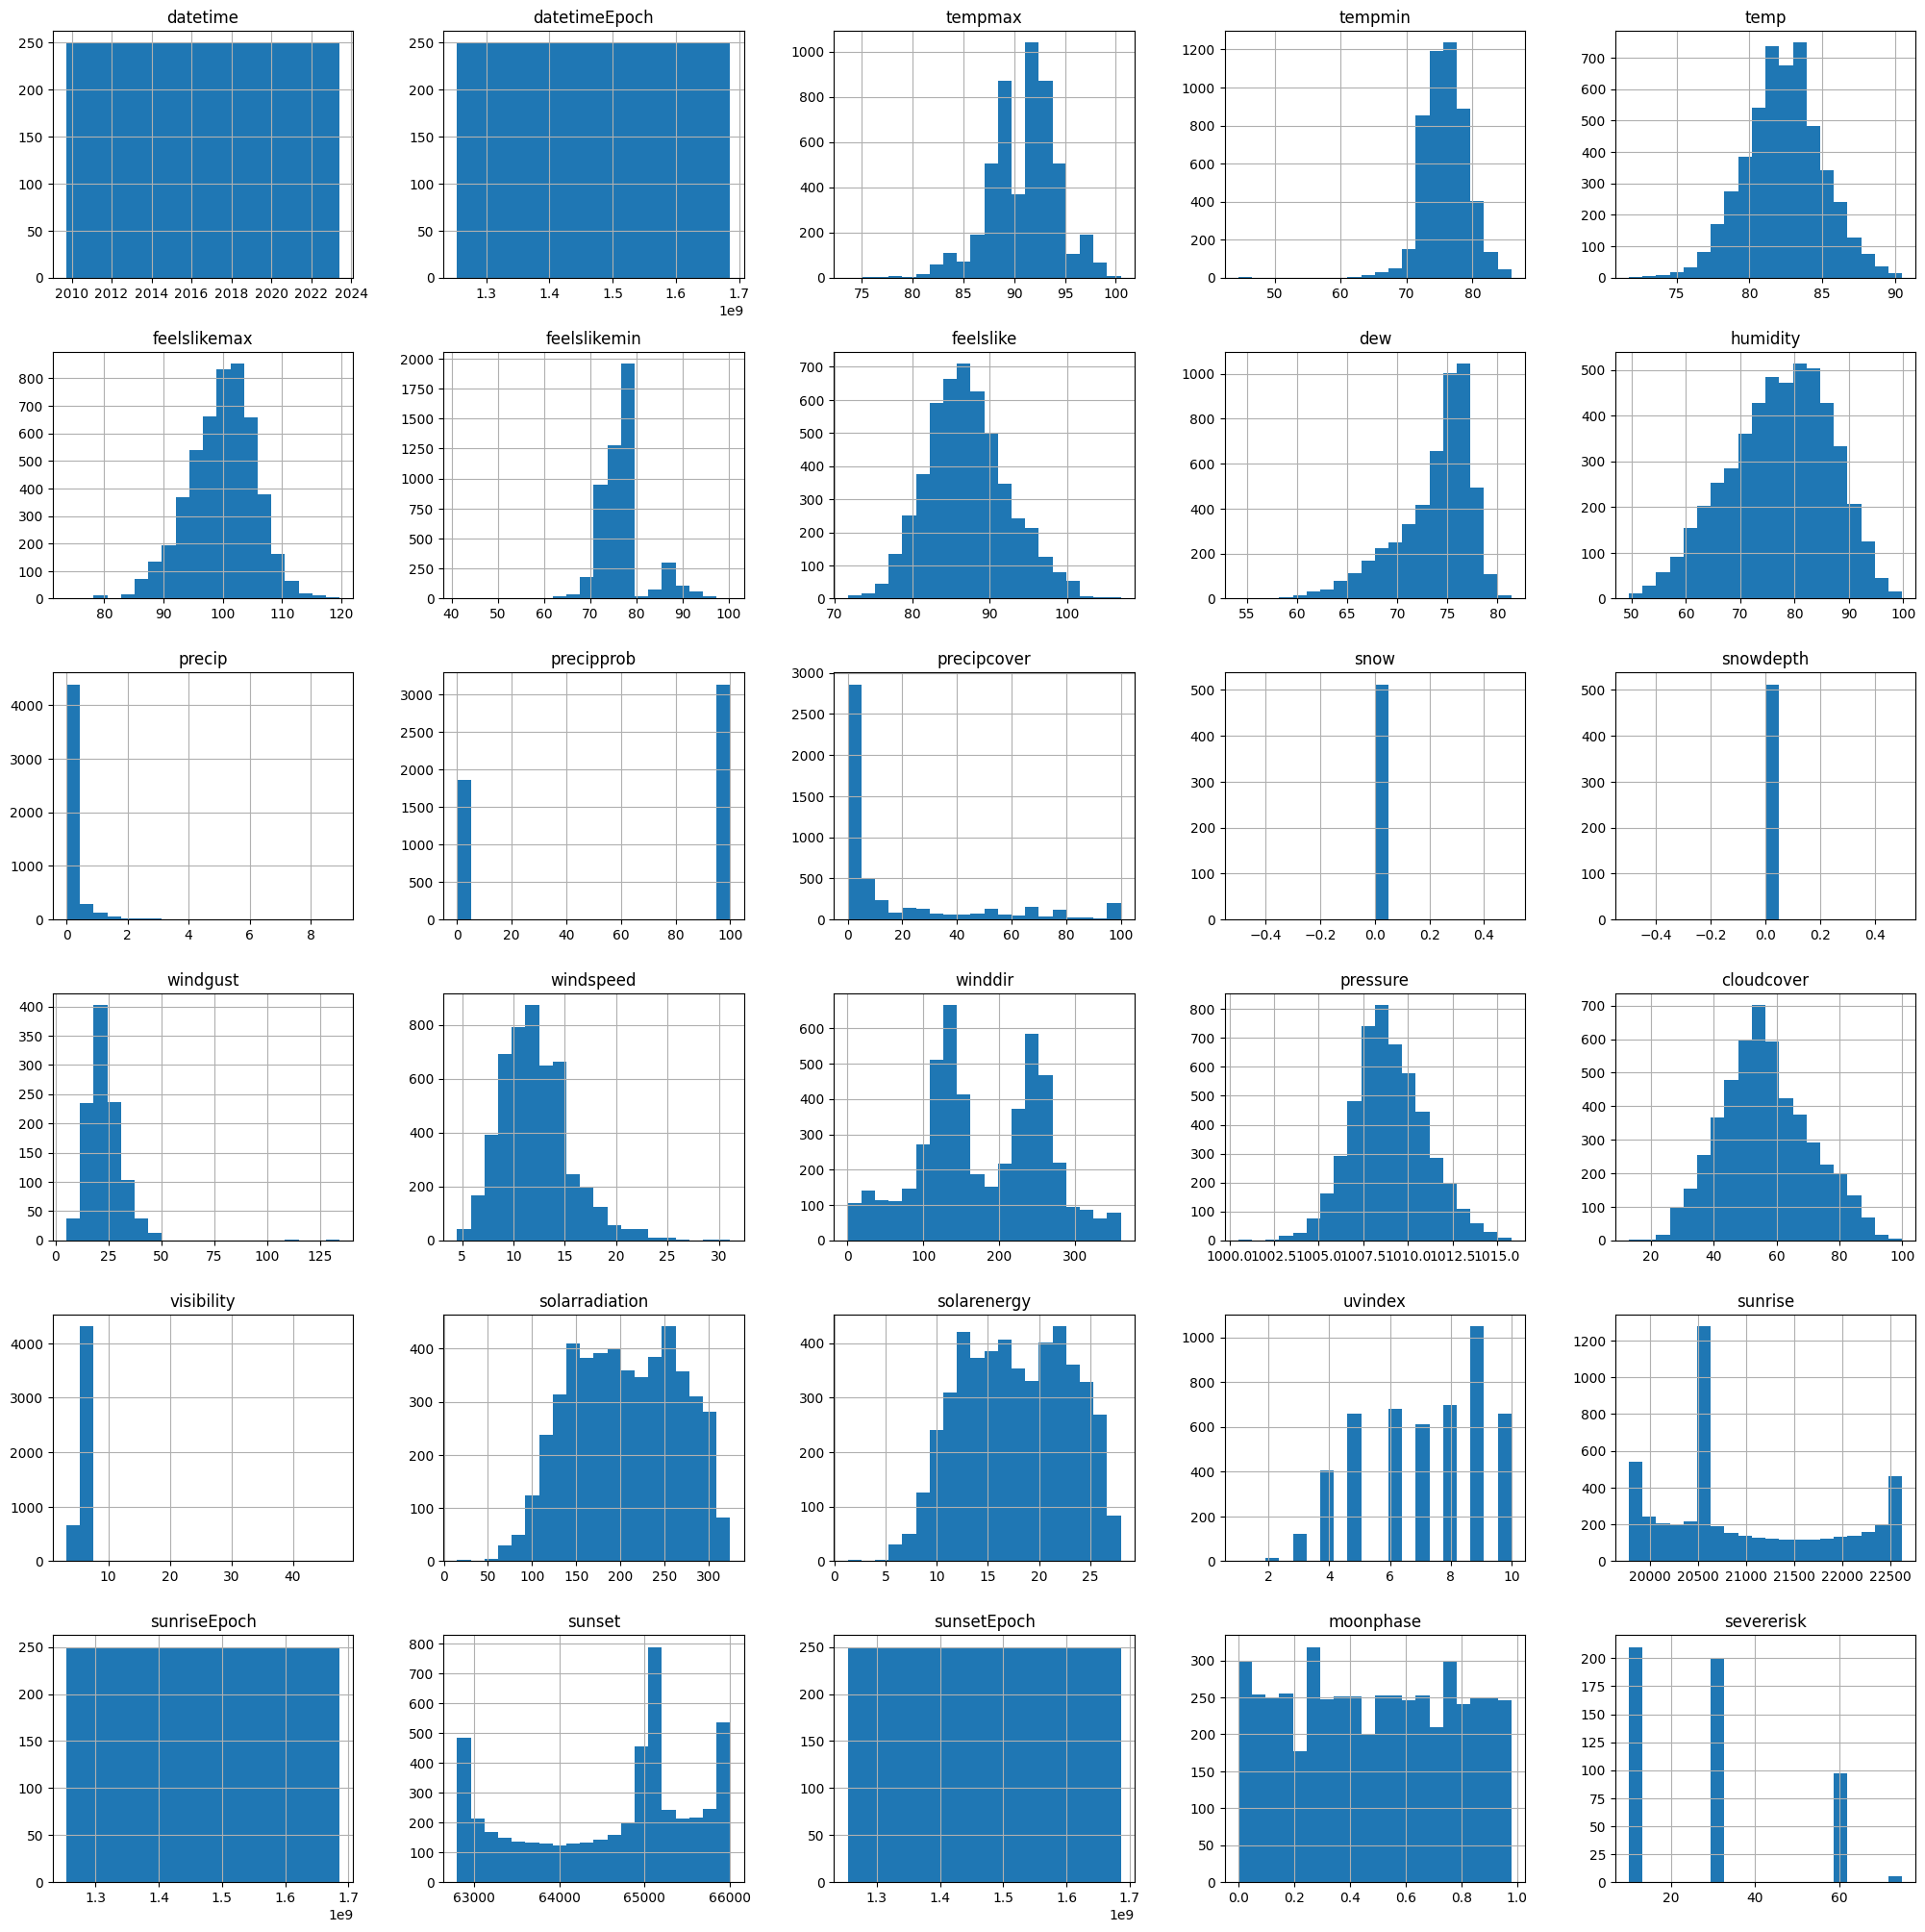

In [33]:
# Visualize histograms for further understanding
raw_data.hist(bins=20, figsize=(25, 25))

### Categorical Data
- [v] **Distribution Analysis:**
  - Analyze the distribution of categorical data.

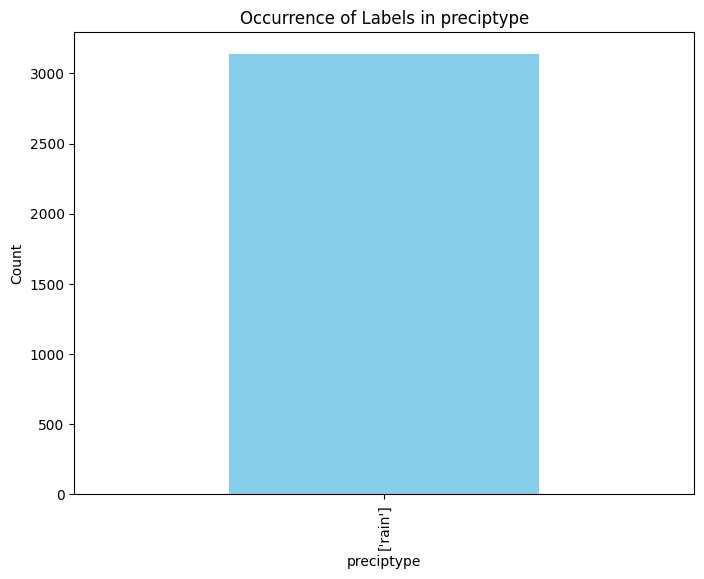

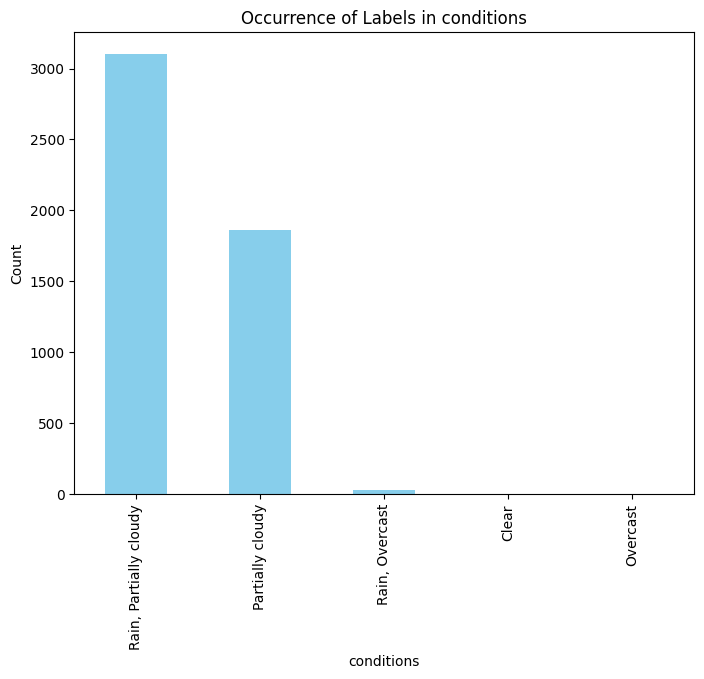

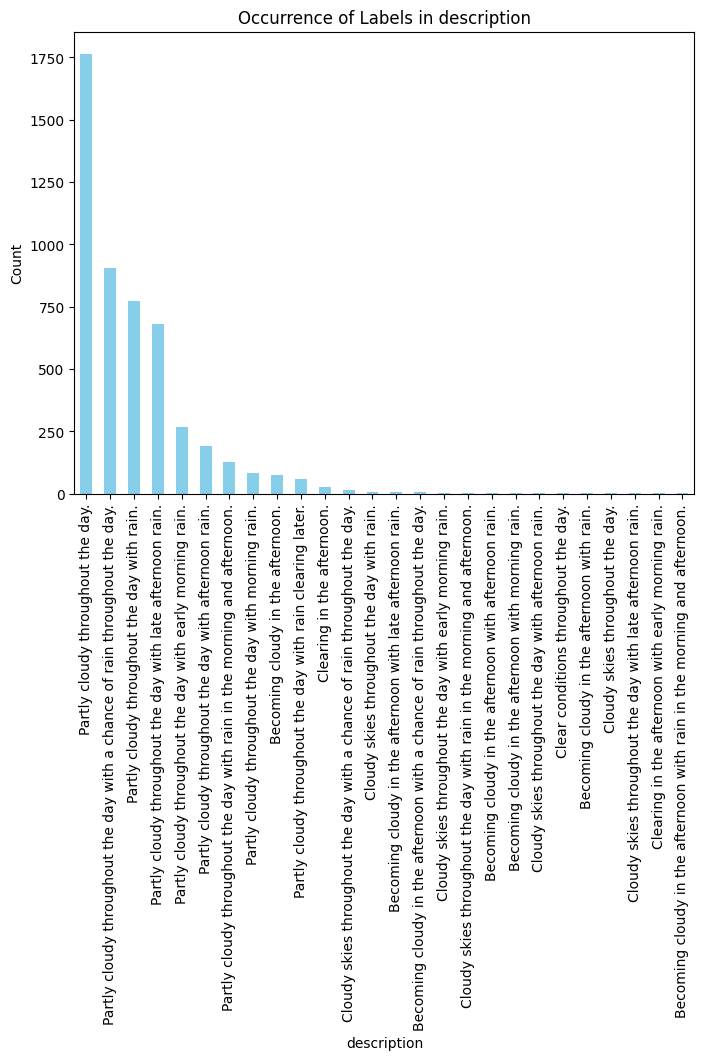

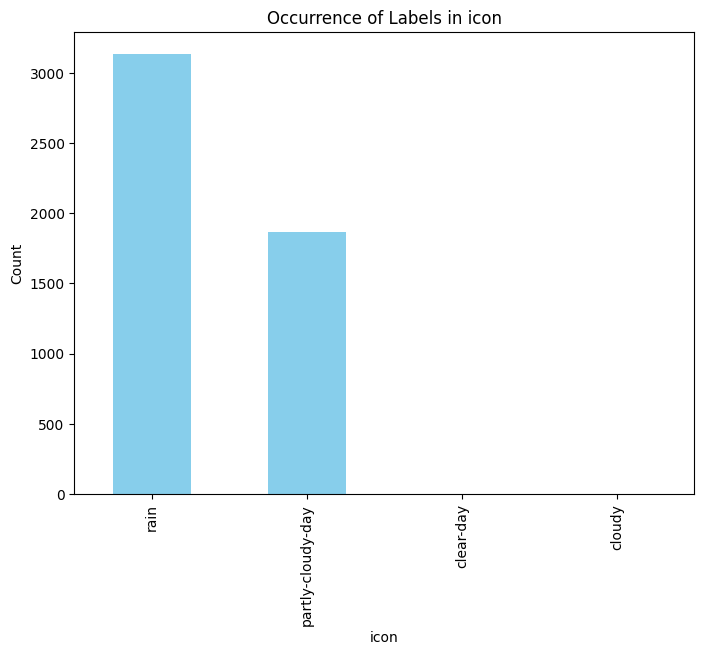

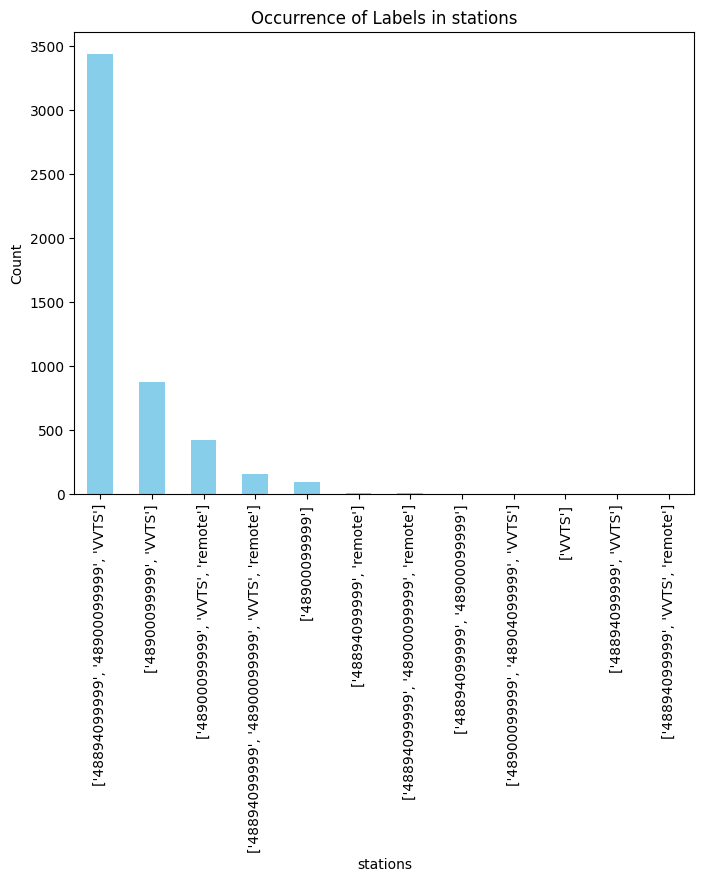

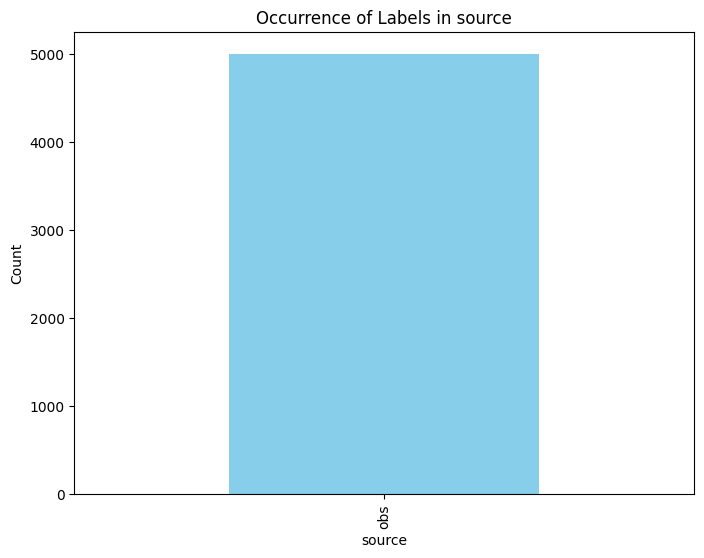

In [34]:
# Plot column chart for each categorical column
for column in raw_data_categorical.columns:
    if column in ['datetime']:
        continue
    
    value_counts = raw_data_categorical[column].value_counts()
    
    # Plotting
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', color='skyblue')
    
    # Adding labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Occurrence of Labels in {column}')
    
    # Show the plot
    plt.show()


## Correlation Analysis
- [ ] **Correlation Visualization:**
  - Use a heatmap or another suitable method to visualize the correlation between each feature.

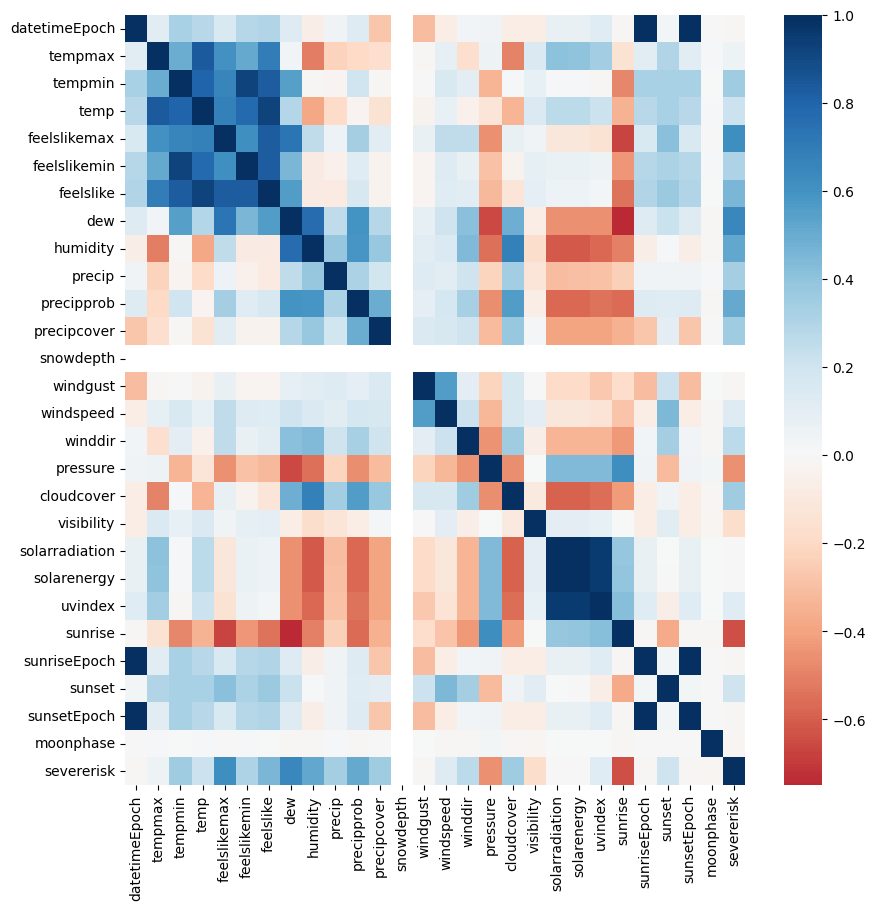

In [35]:
# plot a correlation matrix
def cor_matrix(df: pd.DataFrame, size:tuple =(10,10)):
    fig, ax = plt.subplots(figsize=size)
    sns.heatmap(df.corr(), cmap='RdBu', center=0,ax=ax)
    plt.show()
    
#cor_matrix(raw_data_numeric)

# Drop 'snow' because it has too many missing values
cor_matrix(raw_data_numeric.drop(columns=['snow']))

## Conclusion and Comments
- [ ] **Comments:**
  - Provide clear and concise comments on each result.
  - Ensure proper use of markdown for clarity.

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Đinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Đo Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents



---